<a href="https://colab.research.google.com/github/PatlollaHimaBindu/INSE-6220/blob/main/Raisin_Dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 114.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 111.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 101.0 MB/s eta 0:00:00
   

In [ ]:
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.12.2


In [ ]:
df = pd.read_csv('/content/500 Raisin Dataset.csv')
df.head(25)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,1,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,2,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,3,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,4,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,5,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
5,6,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,Kecimen
6,7,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,Kecimen
7,8,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,Kecimen
8,9,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,Kecimen
9,10,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,Kecimen


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               529 non-null    int64  
 1   Area             529 non-null    int64  
 2   MajorAxisLength  529 non-null    float64
 3   MinorAxisLength  529 non-null    float64
 4   Eccentricity     529 non-null    float64
 5   ConvexArea       529 non-null    int64  
 6   Extent           529 non-null    float64
 7   Perimeter        529 non-null    float64
 8   Class            529 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 37.3+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


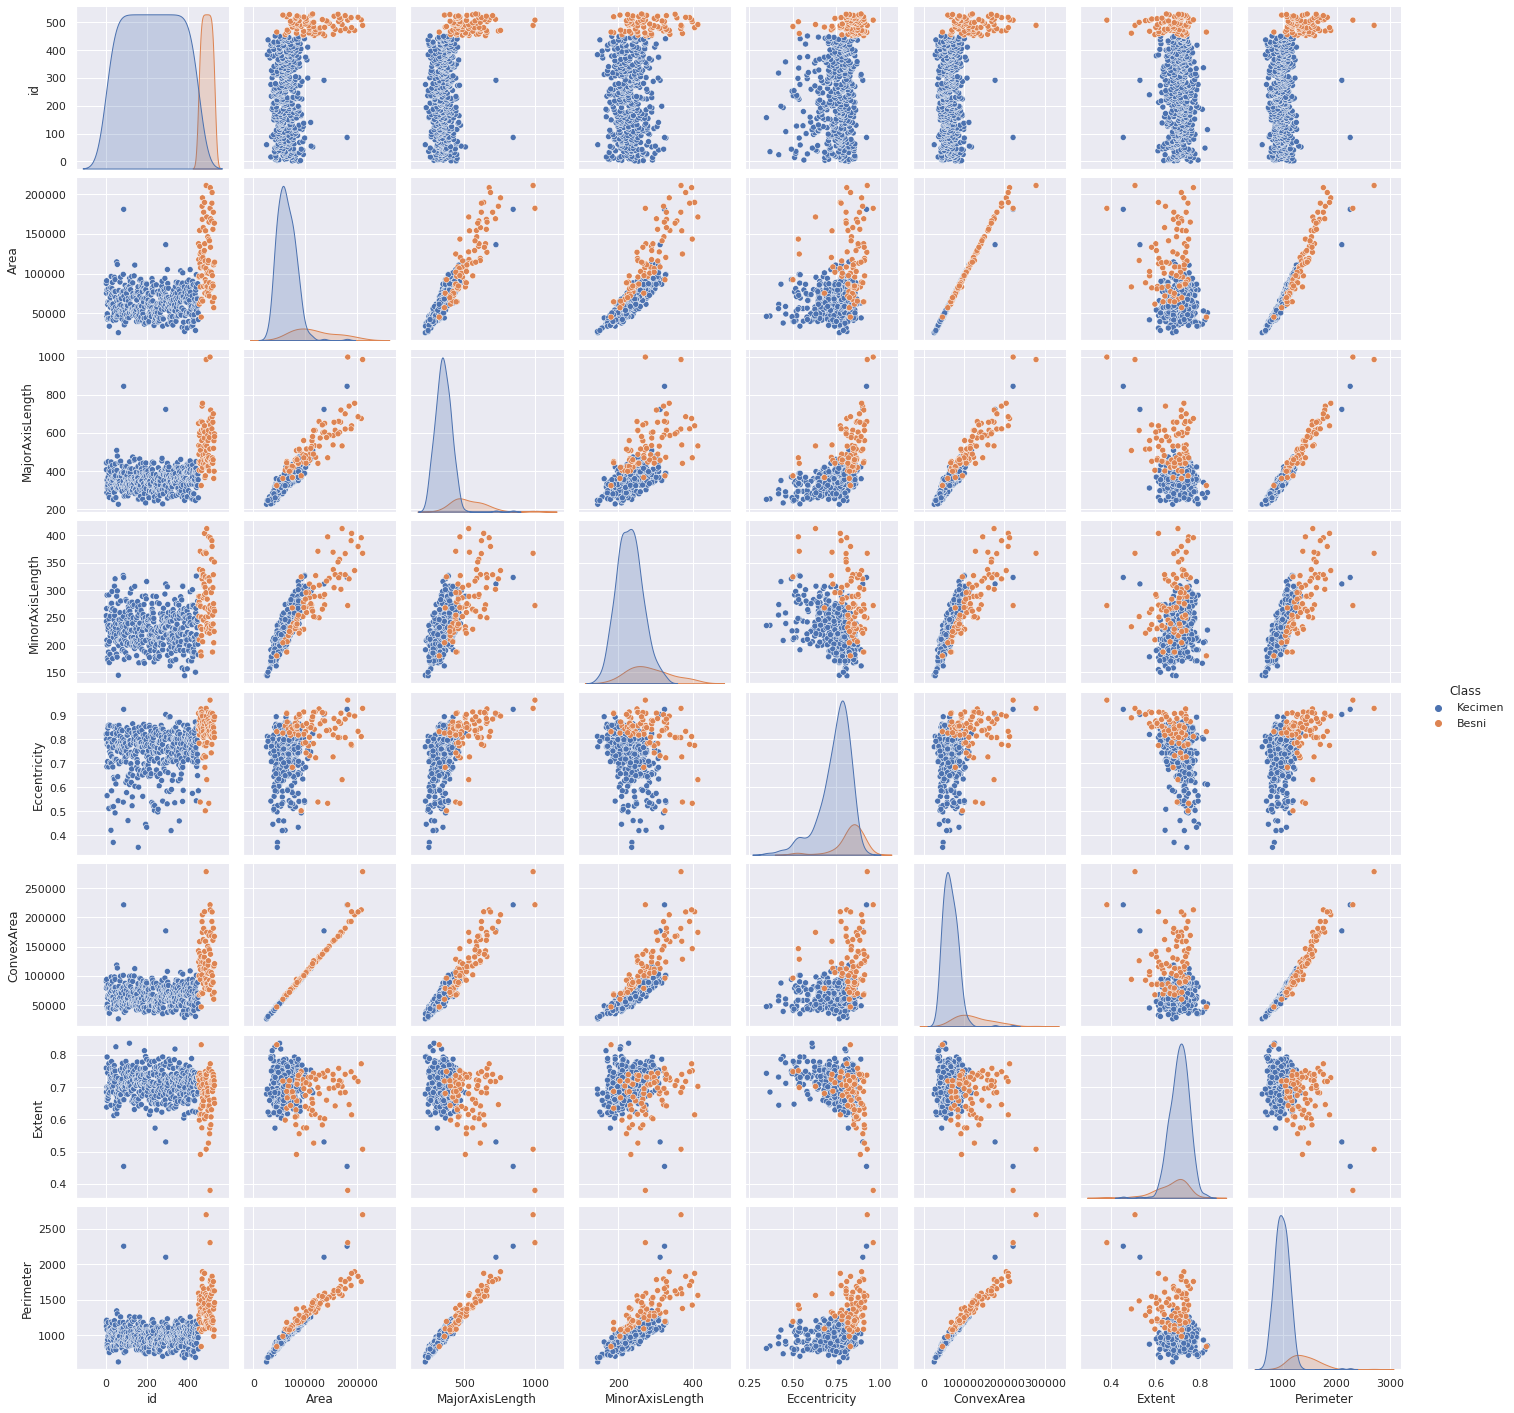

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

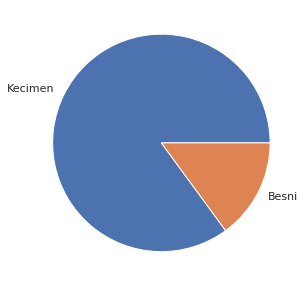

In [ ]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X = df.drop(columns=['Class'])
X.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,1,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,2,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,3,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,4,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,5,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
5,6,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836
6,7,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796
7,8,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366
8,9,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728
9,10,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,529.0,265.000000,152.853416,1.000000,133.000000,265.000000,397.000000,529.000000
Area,529.0,71651.901701,30087.441871,25387.000000,52547.000000,65396.000000,81456.000000,210923.000000
MajorAxisLength,529.0,380.193271,97.451457,225.629541,323.174410,362.640870,410.997919,997.291941
MinorAxisLength,529.0,237.390780,42.639854,143.710872,208.168783,232.820040,258.892006,412.382817
Eccentricity,529.0,0.755170,0.096382,0.348730,0.711475,0.775762,0.819080,0.962124
ConvexArea,529.0,74444.977316,32328.960557,26139.000000,54510.000000,67701.000000,83634.000000,278217.000000
Extent,529.0,0.702620,0.050191,0.379856,0.676864,0.708451,0.735317,0.835455
Perimeter,529.0,1047.009567,233.453375,619.074000,903.769000,1006.375000,1120.019000,2697.753000


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-1.728780,0.528032,0.637358,0.373252,0.670562,0.498509,1.117412,0.587527
1,-1.722231,0.116907,0.272161,0.132435,0.484322,0.134497,-0.368749,0.320609
2,-1.715683,0.638880,0.637574,0.679292,0.448477,0.596687,-1.296425,0.692722
3,-1.709134,-0.855781,-0.961929,-0.672090,-0.728839,-0.839329,-0.060237,-0.869722
4,-1.702586,0.258029,-0.287620,1.254398,-1.985222,0.217287,1.797888,0.112512
5,-1.696038,-0.745531,-0.637513,-0.874861,0.230362,-0.714493,-0.880745,-0.708192
6,-1.689489,-0.970089,-0.719471,-1.438028,0.705460,-0.945588,-0.732426,-0.957043
7,-1.682941,-0.355963,-0.490326,-0.046032,-0.510040,-0.375126,0.817224,-0.487254
8,-1.676392,-0.977940,-0.585498,-1.521492,0.938090,-0.919612,-0.091516,-0.845858
9,-1.669844,-0.241921,-0.135872,-0.225804,0.299989,-0.257597,-0.762696,-0.280688


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,529.0,0.000000e+00,1.000947,-1.728780,-0.864390,0.000000,0.864390,1.728780
Area,529.0,-2.686362e-17,1.000947,-1.539137,-0.635580,-0.208121,0.326162,4.633259
MajorAxisLength,529.0,-4.566815e-16,1.000947,-1.587560,-0.585654,-0.180285,0.316402,6.338364
MinorAxisLength,529.0,1.880453e-16,1.000947,-2.199083,-0.685970,-0.107296,0.504729,4.107839
Eccentricity,529.0,1.343181e-17,1.000947,-4.220973,-0.453782,0.213860,0.663723,2.149275
ConvexArea,529.0,1.611817e-16,1.000947,-1.495616,-0.617213,-0.208802,0.284504,6.309046
Extent,529.0,-1.437204e-15,1.000947,-6.436824,-0.513640,0.116283,0.652080,2.649101
Perimeter,529.0,3.223634e-16,1.000947,-1.834802,-0.614153,-0.174223,0.313033,7.077670


In [ ]:
observations = list(df.index)
variables = list(df.columns)

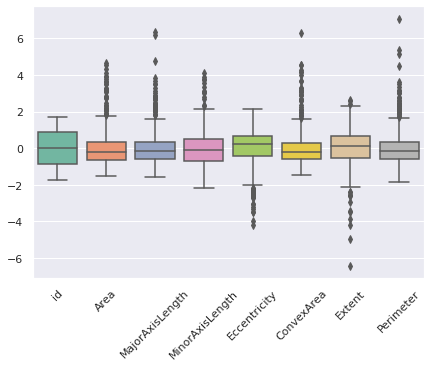

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


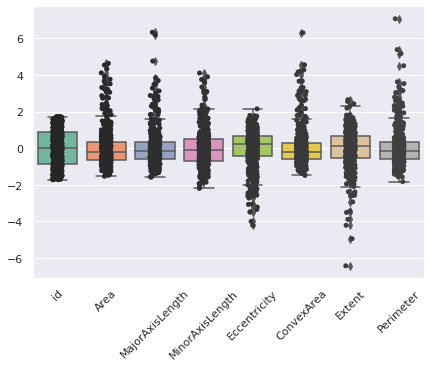

In [ ]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

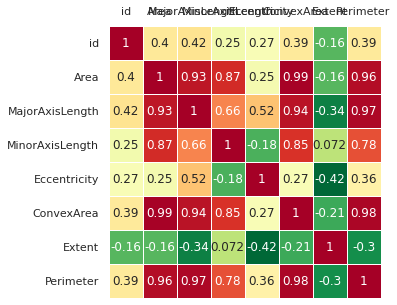

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

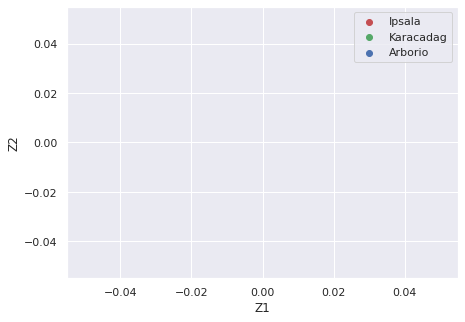

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Ipsala = np.where(y == 1)
idx_Karacadag = np.where(y == 2)
idx_Arborio = np.where(y == 3)

plt. figure()
plt.scatter(Z[idx_Ipsala,0], Z[idx_Ipsala,1], c='r', label='Ipsala')
plt.scatter(Z[idx_Karacadag,0], Z[idx_Karacadag,1], c='g', label='Karacadag')
plt.scatter(Z[idx_Arborio,0], Z[idx_Arborio,1], c='b', label='Arborio')
plt.legend()

plt.xlabel('Z1')
plt.ylabel('Z2')

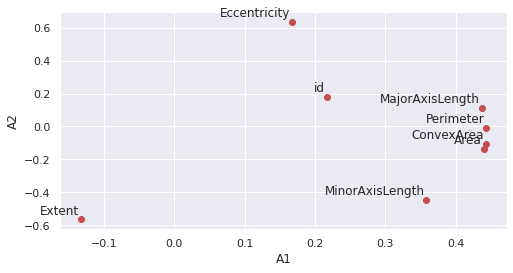

In [ ]:
A = pca.components_.T 
plt. figure(figsize=(8,4))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


In [ ]:
print (list(A))

[array([ 2.17288449e-01,  1.78780186e-01, -9.18632794e-01,  2.75879330e-01,
       -8.00346964e-04,  2.75201955e-02,  8.21702316e-03,  1.49656828e-03]), array([ 0.44023153, -0.13643459,  0.03941844, -0.05660461, -0.11518165,
       -0.62460008, -0.1775131 , -0.58984823]), array([ 0.43691901,  0.11447453,  0.07890958, -0.15117926,  0.43640596,
        0.16015708, -0.69038948,  0.27235526]), array([ 0.35852949, -0.44712912,  0.05449361,  0.1546191 , -0.68079633,
        0.36208803, -0.15918407,  0.15724053]), array([ 0.16761614,  0.63652714, -0.01254251, -0.59684287, -0.44508732,
        0.06622676,  0.08496644,  0.02552052]), array([ 0.44344614, -0.1053131 ,  0.07090728, -0.02334355,  0.11693561,
       -0.39463992,  0.49836798,  0.60737687]), array([-0.13343756, -0.56573545, -0.35605238, -0.71878884,  0.126218  ,
        0.04501137,  0.02709262, -0.00401325]), array([ 0.44384128, -0.00895156,  0.11578103, -0.02237286,  0.32417758,
        0.53870833,  0.45838895, -0.42848663])]


/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


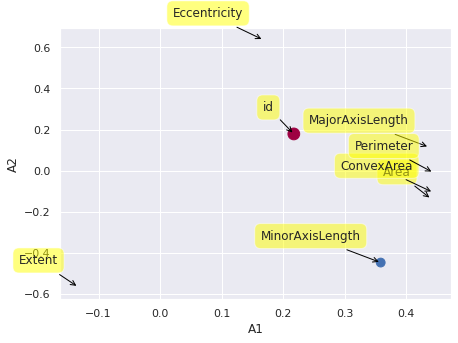

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->',color='black', connectionstyle='arc3,rad=0'))

[4.94991918e+00 1.56695321e+00 7.96802261e-01 6.00133207e-01
 7.01013101e-02 2.21894665e-02 7.85189866e-03 1.20098302e-03]


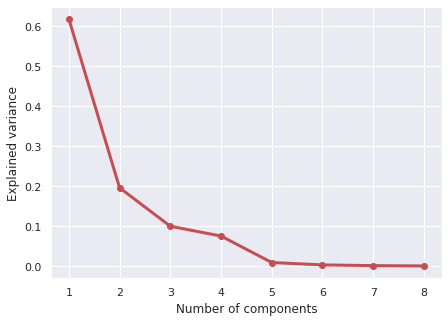

In [ ]:
Lambda = pca.explained_variance_
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
print(Lambda)

Text(0, 0.5, 'Cumulative explained variance')

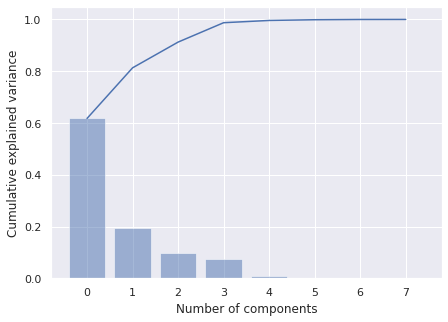

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-7.38131020e-01,  1.47953483e-01,  3.25220172e-01, -3.32076536e-01,
       -3.23806298e+00,  8.43180645e-01,  1.36248343e+00, -1.03097786e+00,
        1.20031069e+00,  4.71957525e-01,  7.46804848e-01,  6.26876187e-01,
       -1.48943741e-01, -3.34965500e+00, -6.89941994e-02,  9.29022054e-01,
        1.93810276e-01, -2.14919188e-01,  5.96051789e-01,  3.65291319e-01,
       -1.17305540e+00, -4.07419712e-01, -6.05831850e-01, -2.22490872e+00,
       -5.90939059e-01, -1.23659524e+00, -2.72662718e+00, -3.17937845e-01,
       -3.20980702e+00, -3.38245292e-01, -1.00174762e+00,  1.04030460e+00,
       -1.32169127e+00, -5.38816505e-01, -2.53840870e+00, -1.94168463e+00,
       -9.66220372e-01,  1.99994541e+00, -3.15657802e-01, -1.55094698e+00,
       -2.53935953e+00, -8.44395779e-01, -1.18267174e+00, -3.57014427e+00,
        1.29887919e+00,  2.13260834e-01, -4.32066747e-01, -2.12913904e+00,
        6.71500670e-01,  7.48651342e-02,  1.39415685e+00, -3.10358466e-01,
        1.73268330e+00,  

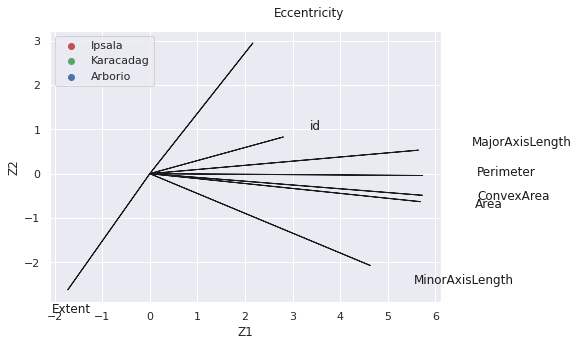

In [ ]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Ipsala,0], Z[idx_Ipsala,1], c='r', label='Ipsala')
plt.scatter(Z[idx_Karacadag,0], Z[idx_Karacadag,1], c='g', label='Karacadag')
plt.scatter(Z[idx_Arborio,0], Z[idx_Arborio,1], c='b', label='Arborio')
plt.legend(loc='upper left')
Z1
Z2